In [13]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

path='data/meth/GSE83947/'

def get_meth(tissue,age,h7):
    fs=glob.glob(path+tissue+'/'+str(age)+'/*')
    print(len(fs))
    dfs=[]
    for i in range(1,len(fs)):
        df=pd.read_table(fs[i],header=None,engine='c')
        df=df[df[5]=='CG']
        df=df[df[3]+df[4]>100]
        df['b']=df[3]/(df[3]+df[4])
        bs=[]
        for j,r in h7.iterrows():
            b=df[(df[1]>r['b'])&(df[1]<r['e'])].b.mean()
            bs.append(b)
        print(np.round(np.mean(np.array(bs)[~np.isnan(bs)]),3),end=',')
        dfs.append(bs)
    return dfs

In [5]:
h=pd.read_csv('data/h.csv',index_col=0)
h['suz']=h.suz/h.suz.max()
h['ez1']=h.ez1/h.ez1.max()
h['ez2']=h.ez2/h.ez2.max()
h['ez']=h[['ez1','ez2']].mean(1)
h['prc']=h[['ez','suz']].mean(1)

In [6]:
hz=h.sort_values('prc',ascending=False).head(1000)
#hz=hz[hz.d>3500]
len(hz)

1000

In [55]:
h7=hz[hz.ch=='chr7']
len(h7)

52

In [28]:
ys=get_meth('r',9,h7)
ys=pd.DataFrame(ys).mean(1)
ys.mean()

216
0.114,0.151,0.117,0.126,0.137,0.136,0.122,0.129,0.159,0.125,0.13,0.131,0.132,0.141,0.132,0.117,0.136,0.141,0.135,0.131,0.129,0.124,0.132,0.135,0.13,0.157,0.151,0.163,0.159,0.116,0.13,

/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/moqri/miniconda3/envs/meth/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan,0.146,0.135,0.13,0.133,0.116,0.111,0.123,0.124,0.131,0.145,0.133,0.121,0.121,0.131,0.132,0.127,0.153,0.132,0.14,0.119,0.134,0.124,0.112,0.121,0.117,0.134,0.126,0.127,0.139,0.12,0.118,0.132,0.143,0.123,0.123,0.139,0.119,0.14,0.126,0.134,0.143,0.12,0.126,0.122,0.147,0.144,0.123,0.163,0.149,0.153,0.131,0.134,0.134,0.128,0.129,0.107,0.116,0.128,0.144,0.119,0.118,0.15,0.131,0.113,0.132,0.138,nan,0.126,0.124,0.13,0.14,0.133,0.129,0.129,0.131,0.125,0.131,0.121,0.127,0.144,0.127,0.132,0.166,0.134,0.127,0.124,0.131,0.132,0.13,0.137,0.13,0.139,0.142,0.145,0.132,0.133,0.132,0.108,0.16,0.158,0.127,0.12,0.126,0.139,0.144,0.142,0.114,0.114,0.141,0.128,0.13,0.137,0.156,0.131,0.124,0.119,0.121,0.123,0.148,nan,0.12,0.132,0.135,0.115,0.138,0.136,0.131,0.132,0.131,0.134,0.163,0.133,0.135,0.131,0.134,0.118,0.138,0.123,0.152,0.144,0.136,0.137,0.12,0.115,0.131,0.142,0.134,0.133,0.123,0.166,0.126,0.146,0.123,0.124,0.144,0.133,0.126,0.125,0.119,0.134,0.123,0.148,0.115,0.116,0.127,0.118,0.131,0.129,0.163,0

0.13175493992347026

In [29]:
os=get_meth('r',25,h7)
os=pd.DataFrame(os).mean(1)
os.mean()

180
0.147,0.165,0.142,0.144,0.152,0.141,0.147,0.142,0.149,0.143,0.15,0.135,nan,0.162,0.151,0.148,0.142,0.172,0.131,0.141,0.15,0.148,0.164,0.152,0.152,0.15,0.155,0.163,0.124,0.16,0.142,0.156,0.141,0.178,0.156,0.162,0.158,0.142,0.148,0.147,nan,0.141,0.134,0.124,0.151,0.155,0.15,0.137,0.146,0.147,0.175,0.158,0.173,0.147,0.166,0.157,0.127,0.156,0.147,0.156,0.152,0.13,0.145,0.129,0.175,0.154,0.167,0.17,0.151,0.133,0.137,0.155,0.141,0.146,0.153,0.146,0.167,0.128,0.137,0.137,0.145,0.151,0.141,0.155,0.147,0.156,0.157,0.156,0.131,0.136,0.158,0.141,0.134,0.147,0.17,0.133,0.143,0.156,0.16,0.161,0.132,0.164,0.144,0.151,0.154,0.145,0.152,0.132,0.156,0.136,0.141,0.162,0.143,0.165,0.142,0.162,0.131,nan,0.152,0.139,0.154,0.138,0.174,0.151,0.159,0.153,0.149,0.141,0.135,0.124,0.158,0.145,0.163,0.157,0.151,0.134,0.152,0.15,0.134,0.151,0.137,0.165,0.134,0.156,0.137,0.15,0.129,0.144,0.144,0.146,0.149,0.132,0.152,0.147,0.135,0.142,0.145,nan,0.157,0.161,0.164,0.161,0.153,0.138,0.171,0.139,0.14,0.149,0.149,0.

0.14859158956861546

In [30]:
pl=pd.concat([ys,os],axis=1)

In [31]:
#pl.to_csv(path+'l/results_ezl.csv')
#l=pd.read_csv(path+'l/results_ezl.csv',index_col=0)
#r=pd.read_csv(path+'r/results.csv',index_col=0)
r=pl

In [ ]:
#l.columns=['9 Months','25 Months']
#l['Tissue']='Liver'

In [35]:
r.columns=['9 Months','25 Months']

In [36]:
r['Tissue']='Lung'

In [37]:
pl=pd.concat([l,r]).melt('Tissue')

In [38]:
pl.columns=['Tissue','Age','DNAm']

[Text(0, 0.5, 'Avergae DNAm'),
 Text(0.5, 1.0, 'DNAm at PRC2 binding regions (mice chr 7)'),
 (0.1, 0.2)]

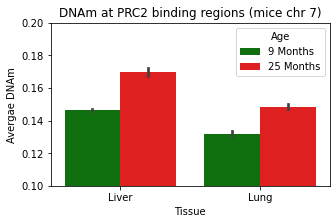

In [57]:
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(data=pl,x='Tissue',y='DNAm',hue='Age',ax=ax,palette=['g','r'])
ax.set(ylabel='Avergae DNAm',title='DNAm at PRC2 binding regions (mice chr 7)',ylim=[0.1,.2])